<h1>Data Science Project: Predict Your Weight By Your Gene
<h5>Kevin Yang 50541650

Instruction
<br>Everybody knows that your height is inherited by your aprents because couple research already prove it.
However, why rarely people say that your weight is inherited by your parent? Because your weight is not
stable, unlike your heights. Some factors could change your weights such as regular exercises, healthy
diet, or even environment could play a significant role.

Assumption
<br>Some studies suggest that while your genes may determine up to 80 percent of your weight and body shape. But how did they get the exact number 80%? Let's take a look of dataset

Dataset
<br>For "Desired Dataset" it will be time series data, which contain certain participant's information.
Such as
<li> Father and Mother's weight 
<li> The age when they have baby
<li> Both Parent and Child's age
<br> However, it is hard to find those open dataset. Hence, I have two dataset, and try to simualate this
    situation.<br> Table 2:
    <li> Sex/Age/Height/Weight/Race
        <br> Table 3"
        <li>Age/Mother's weight/Baby's weight/Race

In [1]:
# import the necessary libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the data set into a Pandas DataFrame
Child = pd.read_csv('Table2.csv')

Check for the dataset information 
<br> Such as datatype and if it contain any Missing Value

In [3]:
# Check missing value
Child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
sex       100 non-null int64
age       100 non-null int64
height    100 non-null float64
weight    100 non-null float64
race      100 non-null int64
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


Variables Representation:
<li> Sex 0 = Female; Sex 1 = Male
<li> Race 1 = White; Race 2 = Black; Race 3 = Other

In [4]:
Child.describe()

,sex,age,height,weight,race
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,0.370000,24.25000,72.129930,139.130828,1.630000
std,0.485237,6.12558,27.868271,25.281016,0.661419
min,0.000000,15.00000,6.491048,84.911253,1.000000
25%,0.000000,19.00000,51.247273,125.177462,1.000000
50%,0.000000,23.00000,78.092957,138.649115,2.000000
75%,1.000000,30.00000,88.509743,155.459755,2.000000
max,1.000000,35.00000,127.927773,204.394707,3.000000


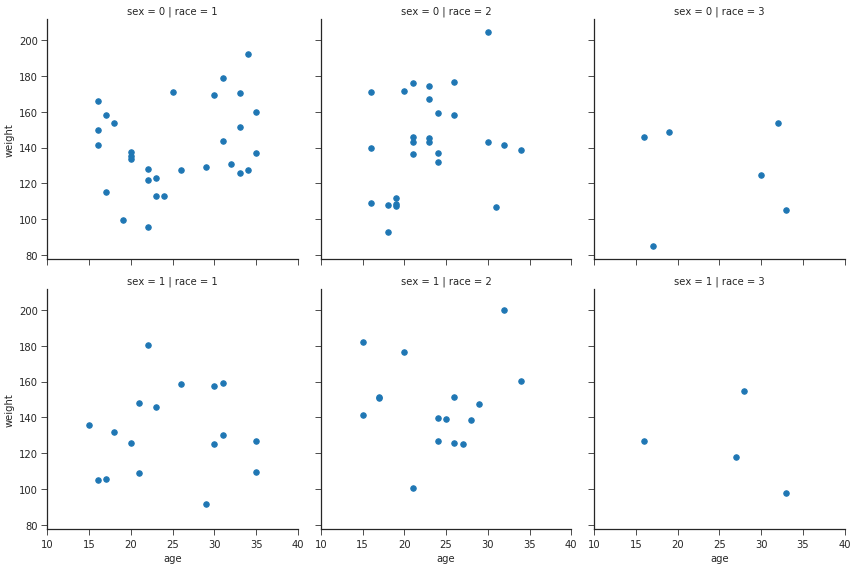

In [5]:
with sns.axes_style('ticks'):
    g = sns.FacetGrid(Child, row ='sex', col = "race", size=4)
    g.map(plt.scatter, "age", "weight", alpha =1, s=30)
    g.set(**dict(xlim = [10,40]));

Give a plot with only age and weight, then we could imagine the trend

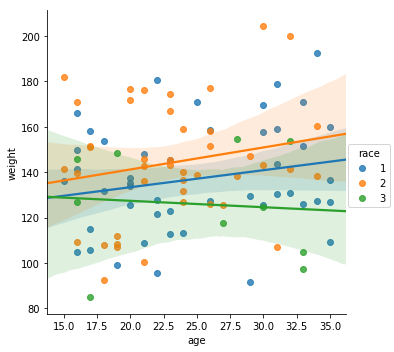

In [6]:
g = sns.lmplot(x ="age", y="weight", data=Child, hue="race")


Use Random Forest for Base line

In [7]:
cols = set(Child.columns.values)
y = Child['weight'].values
xcols = cols - set(['weight'])
x = Child[list(xcols)].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.astype('int'), y.astype('int'), random_state=0)

/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
rf_child = RandomForestClassifier(n_estimators = 100)
rf_child.fit(x_train.astype('int'),y_train.astype('int'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Cross validation - 5 fold

Use Support Vector Machine to against Random Forest

In [9]:
from sklearn.svm import SVC
svm_child = SVC(gamma = 'auto', probability = True)
svm_child.fit(x_train.astype('int'),y_train.astype('int'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
scores = cross_val_score(rf_child, x.astype('int'), y.astype('int'), cv=5)
scores1 = cross_val_score(svm_child, x.astype('int'), y.astype('int'), cv=5)
print("Random Forest Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))
print("Support Vector Machine Accuracy: %0.2f(+/- %0.2f)" %(scores1.mean(), (scores1.std()/np.sqrt(len(scores1)))))

/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.01(+/- 0.01)
Support Vector Machine Accuracy: 0.03(+/- 0.02)


Calculate Mean Average Error for each model

In [11]:
from sklearn import metrics
y_pred = rf_child.predict(x_test)
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
print('Random Forest MAE: ',mae_rf)
y_pred1 = svm_child.predict(x_test)
mae_svm = metrics.mean_absolute_error(y_test, y_pred1)
print('Support Vector Machine MAE', mae_svm)

Random Forest MAE:  25.32
Support Vector Machine MAE 24.6


Load another data set which contain Parental information to compare to child 

In [12]:
Parent = pd.read_csv('Table3.csv')
Parent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
age         189 non-null int64
m_weight    189 non-null int64
b_weight    189 non-null int64
race        189 non-null int64
dtypes: int64(4)
memory usage: 6.0 KB


In [13]:
Parent.describe()

,age,m_weight,b_weight,race
count,189.000000,189.000000,189.000000,189.000000
mean,23.238095,129.814815,2944.587302,1.846561
std,5.298678,30.579380,729.214295,0.918342
min,14.000000,80.000000,709.000000,1.000000
25%,19.000000,110.000000,2414.000000,1.000000
50%,23.000000,121.000000,2977.000000,1.000000
75%,26.000000,140.000000,3487.000000,3.000000
max,45.000000,250.000000,4990.000000,3.000000


Variables Representation:
<li>m_weight: mother's weight
<li>b_weight: baby's weight
<li>race 1 = White; race 2 = Black; race 3 = Other

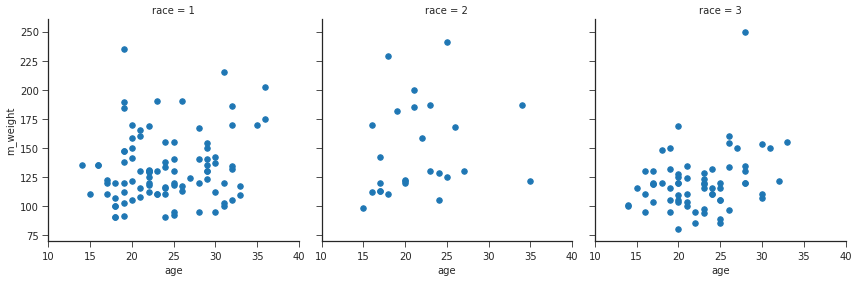

In [14]:
with sns.axes_style('ticks'):
    g = sns.FacetGrid(Parent, col ='race', size=4)
    g.map(plt.scatter, "age", "m_weight", alpha =1, s=30)
    g.set(**dict(xlim = [10,40]));

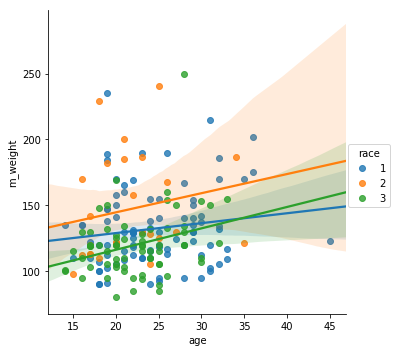

In [15]:
h = sns.lmplot(x ="age", y="m_weight", data=Parent, hue="race")

Splite the data and use Random Forest for Base line

Change baby weight to the lb, same unit with mother's weight

In [16]:
Parent = Parent.assign(b_weight=lambda x:x['b_weight']*0.00220462)

In [17]:
cols = set(Parent.columns.values)
y = Parent['b_weight'].values
xcols = cols - set(['b_weight'])
x = Parent[list(xcols)].values
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.astype('int'), y.astype('int'), random_state=0)

In [18]:
rf_parent = RandomForestClassifier(n_estimators = 100)
rf_parent.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Use Support Vector Machine to against the Base line

In [19]:
svm_parent = SVC(gamma = 'auto', probability = True)
svm_parent.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
scores = cross_val_score(rf_parent, x, y.astype('int'), cv=5)
scores1 = cross_val_score(svm_parent, x.astype('int'), y.astype('int'), cv=5)
print("Random Forest Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))
print("Support Vector Machine Accuracy: %0.2f(+/- %0.2f)" %(scores1.mean(), (scores1.std()/np.sqrt(len(scores1)))))

/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.16(+/- 0.02)
Support Vector Machine Accuracy: 0.24(+/- 0.02)


/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Calculate the mean average error for each model

In [21]:
y_pred = rf_parent.predict(x_test)
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
print('Random Forest MAE: ',mae_rf)
y_pred1 = svm_parent.predict(x_test)
mae_svm = metrics.mean_absolute_error(y_test, y_pred1)
print('Support Vector Machine MAE', mae_svm)

Random Forest MAE:  1.7083333333333333
Support Vector Machine MAE 1.5833333333333333


According the my assumption, 80% of child's weight should be similar to their parent's weight
<br>So, I adjust the Mother's weight.
<br>For more accuracy, we should have both mother and father's weight because xy chromosome
<br>And based on the graph below we can see that befor age 25, two weights are similar, but
after 25, the metabolism gradually decrease. Therefore, their weight may contain a lot difference.

In [22]:
Parent = pd.read_csv('Table3.csv')
Parent = Parent.assign(m_weight=lambda x:x['m_weight']*80/100)

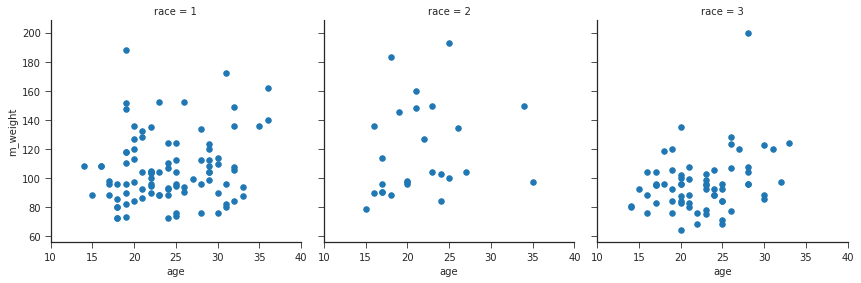

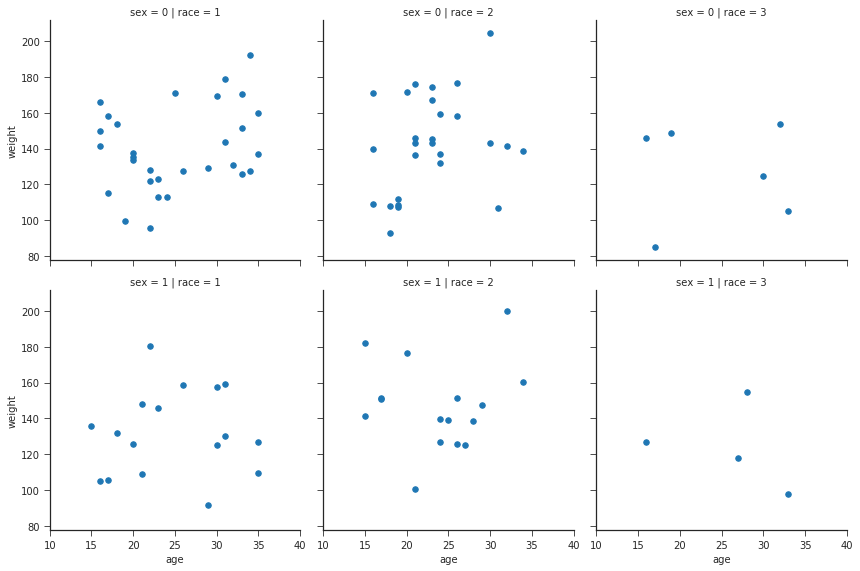

In [23]:
with sns.axes_style('ticks'):
    h = sns.FacetGrid(Parent, col ='race', size=4)
    h.map(plt.scatter, "age", "m_weight", alpha =1, s=30)
    h.set(**dict(xlim = [10,40]));
    
    g = sns.FacetGrid(Child, row ="sex", col = "race", size=4)
    g.map(plt.scatter, "age", "weight", alpha =1, s=30)
    g.set(**dict(xlim = [10,40]));

I random pick up 40, 40, 10 records for 3 races and assign those child information to parent
<br>try to predict if it is around 80% weight that inherited by parents

In [24]:
Predict = pd.read_csv('Table4.csv')

adjust unit and weight value for better predict

In [25]:
Predict = Predict.assign(m_weight=lambda x:x['m_weight']*80/100)
Predict = Predict.assign(b_weight=lambda x:x['b_weight']*0.00220462)

In [26]:
Predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
m_age       89 non-null int64
m_weight    89 non-null float64
b_weight    89 non-null float64
sex         89 non-null int64
age         89 non-null int64
height      89 non-null float64
weight      89 non-null float64
race        89 non-null int64
dtypes: float64(4), int64(4)
memory usage: 5.6 KB


In [27]:
Predict.describe()

,m_age,m_weight,b_weight,sex,age,height,weight,race
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,21.943820,106.858427,6.615916,0.370787,23.044944,71.557731,137.804685,1.674157
std,6.294586,25.805676,1.594658,0.485752,5.361712,28.413789,24.612949,0.670402
min,14.000000,72.000000,2.250917,0.000000,15.000000,6.491048,84.911253,1.000000
25%,18.000000,89.600000,5.321953,0.000000,19.000000,51.005061,123.132531,1.000000
50%,20.000000,97.600000,6.750546,0.000000,23.000000,77.906207,138.901837,2.000000
75%,23.000000,117.600000,7.874903,1.000000,27.000000,88.203486,153.721516,2.000000
max,45.000000,188.000000,11.001054,1.000000,33.000000,127.927773,204.394707,3.000000


In [28]:
y = Predict['weight'].values
xcols = cols - set(['weight'])
x = Predict[list(xcols)].values

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y.astype('int'), random_state = 0)
rf_predict = RandomForestClassifier(n_estimators = 100)
rf_predict.fit(x_train,y_train)
svm_predict = SVC(gamma = 'auto', probability = True)
svm_predict.fit(x_train.astype('int'),y_train.astype('int'))
scores = cross_val_score(rf_predict, x, y.astype('int'), cv=3)
scores1 = cross_val_score(svm_predict, x.astype('int'), y.astype('int'), cv=3)
print("Random Forest Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))
print("Support Vector Machine Accuracy: %0.2f(+/- %0.2f)" %(scores1.mean(), (scores1.std()/np.sqrt(len(scores1)))))

/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Random Forest Accuracy: 0.13(+/- 0.05)
Support Vector Machine Accuracy: 0.18(+/- 0.13)


/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [30]:
y_pred = rf_predict.predict(x_test)
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
print('Random Forest MAE: ',mae_rf)
y_pred1 = svm_predict.predict(x_test)
mae_svm = metrics.mean_absolute_error(y_test, y_pred1)
print('Support Vector Machine MAE', mae_svm)

Random Forest MAE:  29.217391304347824
Support Vector Machine MAE 19.130434782608695


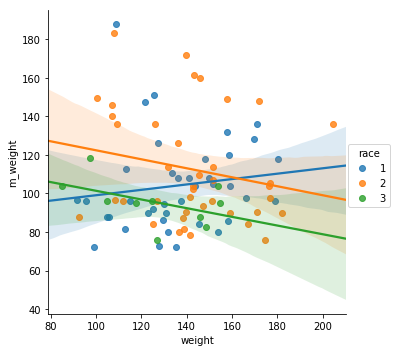

In [31]:
k = sns.lmplot(x="weight", y = "m_weight", data= Predict, hue = "race")

So, based on the figure below, the overall Child's weight is higher than Parents.

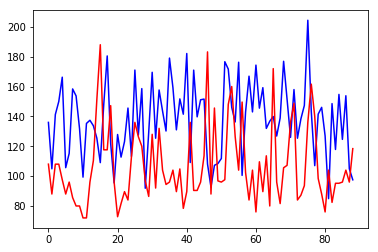

In [32]:
plt.plot(Predict['weight'].values, color = 'b')
plt.plot(Predict['m_weight'].values, color = 'r')